In [1]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

# Objective of the task is to predict the Profit of the state based on the other factors.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Assuming the file is in the same directory as your script/notebook
file_path = "50_Startups.csv"
dataset = pd.read_csv(file_path)

# Print sample data
dataset.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Separate the independednt and Dependent variables.
# Profit is the dependedent variable

## What is the role of the axis and inplace in following code?

In [3]:
y = np.asarray(dataset['Profit'].values.tolist())

dataset.drop(["Profit"], axis = 1, inplace = True)

# We will convert  Categorical Variable values "State" to numbers with the One Hot Encoding Technique

# Initially, we will counts value that the feature "State" can take.

# Remember .value_counts() function

In [4]:
dataset.iloc[:,3].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

# Replacing the three states by the numbers 1, 2, 3.
# This is also called as the LabelEncoding

In [5]:
dataset.replace(to_replace=["California","New York", "Florida"], value=[1,2,3])

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,1
2,153441.51,101145.55,407934.54,3
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,3
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,1
7,130298.13,145530.06,323876.68,3
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,1


# We will create 3 more columns for the three states.

In [6]:
dataset["California"] = dataset.iloc[:, 3]
dataset["New York"] = dataset.iloc[:,3]
dataset["Florida"] = dataset.iloc[:,3]

# Check how the dataset looks now

In [7]:
# Your code to print few samples of dataset.

# One-hot encode the 'State' column
one_hot_encoded_states = pd.get_dummies(dataset['State'], prefix='State')

# Concatenate the original dataset with the one-hot encoded columns
dataset = pd.concat([dataset, one_hot_encoded_states], axis=1)

# Drop the original 'State' column
dataset = dataset.drop('State', axis=1)

# Check how the dataset looks now
print(dataset.head())


   R&D Spend  Administration  Marketing Spend  California    New York  \
0  165349.20       136897.80        471784.10    New York    New York   
1  162597.70       151377.59        443898.53  California  California   
2  153441.51       101145.55        407934.54     Florida     Florida   
3  144372.41       118671.85        383199.62    New York    New York   
4  142107.34        91391.77        366168.42     Florida     Florida   

      Florida  State_California  State_Florida  State_New York  
0    New York             False          False            True  
1  California              True          False           False  
2     Florida             False           True           False  
3    New York             False          False            True  
4     Florida             False           True           False  


# Performing one hot encoding for the column Calfornia.
## Replace text 'California' with 1 and others with 0 for this column.

In [8]:
dataset.loc[dataset["California"]!="California", "California"] = 0
dataset.loc[dataset["California"]=="California", "California"] = 1

# Perform the one hot encoding for New York and the Florida column

In [9]:
# Performing One Hot Encoding for the column "New York"
dataset.loc[dataset["New York"]!="New York", "New York"] = 0
dataset.loc[dataset["New York"]=="New York", "New York"] = 1

In [10]:
# Performing One Hot Encoding for the column "Florida"
dataset.loc[dataset.Florida!="Florida", "Florida"] = 0
dataset.loc[dataset.Florida=="Florida", "Florida"] = 1

# Now look at the dataset
## Can you find the state name from numbers in last three columns only?

In [11]:
#Let's have a look at the Data
dataset.head()

,R&D Spend,Administration,Marketing Spend,California,New York,Florida,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1,0,False,False,True
1,162597.70,151377.59,443898.53,1,0,0,True,False,False
2,153441.51,101145.55,407934.54,0,0,1,False,True,False
3,144372.41,118671.85,383199.62,0,1,0,False,False,True
4,142107.34,91391.77,366168.42,0,0,1,False,True,False


# Drop the State and one of the three states column.
## Question - Why we are dropping one column for the state?

In [12]:
# Dropping the columns
dataset.drop(["State", "Florida"], axis = 1, inplace = True)
dataset.head()


KeyError: "['State'] not found in axis"

# Lets's check the dataset again.
## Question - Can you guess the name of three states from the numbers (1/0) in last two column?

In [13]:
# Your code to print sample dataset.


# Let's further process independent variables.



In [14]:

X = np.asarray(dataset.values.tolist()).astype(float)

# Print the shapes of the aray

In [15]:
#Get the shapes of X and y
print("The shape of the independent fatures are ",X.shape)
print("The shape of the dependent fatures are ",y.shape)

The shape of the independent fatures are  (50, 9)
The shape of the dependent fatures are  (50,)


# Change the shape of the dependent variable to (len(y), 1)

In [16]:
# Your code to change the shape of the y to (len(y), 1)
y = y.reshape(len(y), 1)


# Perform feature scaling
## We will study this in detail in class.
## For now, guess what following code is doing

In [17]:

for i in range(X.shape[1]-2):
    X[:,i] = (X[:,i] - int(np.mean(X[:,i])))/np.std(X[:,i])

In [18]:
y = (y - int(np.mean(y)))/np.std(y)

# Adding the feature X0 = 1, so we have the equation: y =  theta[0] * X0) + theta[2] * X1


In [19]:
X = np.concatenate((X,np.ones((50,1))), axis = 1)

# Let's see X, y and their shapes

In [20]:
# Your code to print sample values in X
# Assuming X is your feature matrix
print("Sample values in X:")
print(X[:5])  # Print the first 5 rows for example


Sample values in X:
[[ 2.01642504  0.56077597  2.1539439   0.          2.11100165  0.
   0.          0.          1.          1.        ]
 [ 1.95587388  1.08282964  1.9236012   2.11100165  0.          0.
   2.11100165  0.          0.          1.        ]
 [ 1.75437728 -0.72823397  1.62652848  0.          0.          2.14373231
   0.          1.          0.          1.        ]
 [ 1.55479724 -0.09634157  1.42221104  0.          2.11100165  0.
   0.          0.          1.          1.        ]
 [ 1.50495075 -1.07989629  1.28152852  0.          0.          2.14373231
   0.          1.          0.          1.        ]]


In [21]:
# Your code to print the sample values in y
# Assuming y is your dependent variable
print("Sample values in y:")
print(y[:5])  # Print the first 5 values for example


Sample values in y:
[[2.01121935]
 [1.99944599]
 [1.98085827]
 [1.77664326]
 [1.35775614]]


# Let's assign the X to a variable Independedent variable.

In [22]:
Indpendent_Variables = pd.DataFrame(X)


# Print Independent variable.

In [23]:
# Your code to print independent variable.
# Assuming Indpendent_Variables is your DataFrame containing independent variables
print("Independent Variables:")
print(Indpendent_Variables.head())


Independent Variables:
          0         1         2         3         4         5         6    7  \
0  2.016425  0.560776  2.153944  0.000000  2.111002  0.000000  0.000000  0.0   
1  1.955874  1.082830  1.923601  2.111002  0.000000  0.000000  2.111002  0.0   
2  1.754377 -0.728234  1.626528  0.000000  0.000000  2.143732  0.000000  1.0   
3  1.554797 -0.096342  1.422211  0.000000  2.111002  0.000000  0.000000  0.0   
4  1.504951 -1.079896  1.281529  0.000000  0.000000  2.143732  0.000000  1.0   

     8    9  
0  1.0  1.0  
1  0.0  1.0  
2  0.0  1.0  
3  1.0  1.0  
4  0.0  1.0  


# Following function splits the data into two sets - trainset and testset.
# We can also do the same operation using  train_test_split method available in sklearn.model_selection.
# But, let's create our own method to split data.

# In the following code, set radom_state as your SID.

## Comment each line of the code about what its doing.

In [24]:
def split_data(X, y, test_size=0.2, random_state=2162775):  # Set variable random_state as your SID

    np.random.seed(random_state)  # Set the random seed for reproducibility
    indices = np.random.permutation(len(X))  # Shuffle the indices of the data

    data_test_size = int(X.shape[0] * test_size)  # Calculate the size of the test set

    # Separate the indices for training and testing
    train_indices = indices[data_test_size:]
    test_indices = indices[:data_test_size]

    # Split the data into training and testing sets based on the indices
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]

    return X_train, y_train, X_test, y_test  # Return the split datasets


#Comment each line of the following code about what its doing.

In [25]:
def forward(X, y, theta):
    y_pred = np.sum(theta * X)  # Calculate the predicted value using the linear regression formula
    loss = ((y_pred - y)**2) / 2  # Calculate the loss using the mean squared error formula

    return loss, y_pred  # Return both the loss and predicted values


# Comment each line of the code about what its doing.

## What is the problem with the following code? Can it be written more efficiently?

In [26]:
def updateTheta(X, y_pred, y_true, theta, alpha, index):
    for i in range(X.shape[1]):
        theta[0, i] -= (alpha * (y_pred - y_true[index]) * X[index, i])

    return theta  # Return the updated theta array


## Comment each line of the code about what its doing.

In [27]:
def gradient_descent(X, y, epochs = 10, alpha = 0.001, random_state=0):

    num_rows = X.shape[0]
    num_cols = X.shape[1]

    theta = np.random.randn(1,num_cols) / np.sqrt(num_rows)
    train_loss = []
    num_epochs = []
    train_indices = [i for i in range(X.shape[0])]

    for j in range(epochs):
        cost=0
        np.random.seed(random_state)
        np.random.shuffle(train_indices)

        for i in train_indices:
            loss, y_pred = forward(X[i],y[i],theta)
            cost+=loss
            theta = updateTheta(X,y_pred,y,theta,alpha,i)

        train_loss.append(cost)
        num_epochs.append(j)

    return theta, train_loss, num_epochs

## Comment each line of the code about what its doing.

In [28]:
def test(X_test, y_test, theta_updated):
    test_pred = []  # List to store test predictions
    test_loss = []  # List to store test loss

    test_indices = [i for i in range(X_test.shape[0])]  # Indices for test samples

    for i in test_indices:
        loss, y_test_pred = forward(X_test[i], y_test[i], theta_updated)
        test_pred.append(y_test_pred)
        test_loss.append(loss)

    return test_pred, test_loss

## Comment each line of the code about what its doing.

In [29]:
def predict(theta_updated, X_sample):

    prediction = np.sum(theta_updated * X_sample)

    return prediction

# Create a good plot Epochs vs loss.

In [30]:
def plotLoss(loss, epochs):
    plt.plot(epochs, loss, marker='o', linestyle='-', color='b')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Epochs vs Loss')
    plt.grid(True)
    plt.show()


# Calling the method  split_data to get train and test set.
## Following code has one minor error. Correct this error.



In [31]:
# Assuming you have already defined the function split_data
# and set random_state as a SID
X_train, y_train, X_test, y_test = split_data(X, y, random_state=2162775)


# Call the gradient descent function with the number of epochs and learning rate of your choice. Keep number of epochs greater that 200 and learning rate less than 0.05.

In [32]:
# Assuming you have already defined the gradient_descent function
theta_updated, train_loss, num_epochs = gradient_descent(X_train, y_train, epochs=300, alpha=0.01)


# Test your regression model using test data.

In [33]:
# Your code to test the model on test data and updated theta values.
test_pred, test_loss = test(X_test, y_test, theta_updated)


# Plot the loss function.

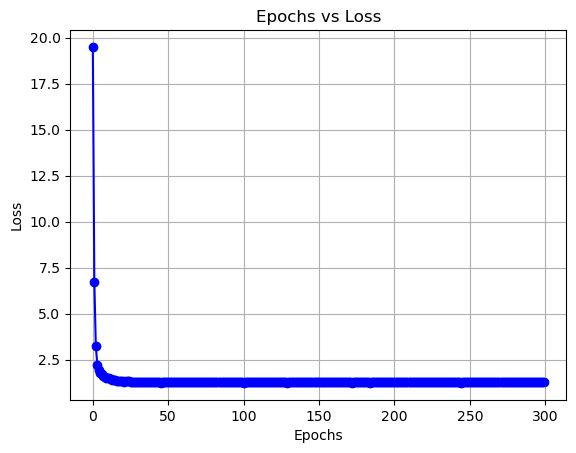

In [34]:
# Your code to plot epochs vs loss. Call the method.
# Assuming you have already defined the plotLoss function
plotLoss(train_loss, num_epochs)


Perform the predictions on X_tset. Call predict method.

In [35]:
# Your code to predict the profit i.e. y values
y_pred_test = [predict(theta_updated, X_sample) for X_sample in X_test]

# Print or use y_pred_test as needed
print(y_pred_test)


[-0.37196168569964655, 2.0307210444595145, -0.5467191408746594, 0.11801574869786692, -0.002607169624308847, 0.05936544407459517, 0.05656155209934528, -0.41931638548333083, -1.1100700099781675, -1.3285335403241822]


# **Imortant - Lab Logbook requirement:**

# Please document the following in your lab logbook:

# 1. Plot the loss function.
# 2. Record the output of all the predictions on the test data; i.e., all the predicted y values.

# **Optional Part:**
# The rest of this notebook is Optional. It is recommended for you to complete it. However, if you have not marks would not be deducted.

# Fitting the model using sklearn and comparing with our model.

# Following piece of code is uncommented. Please comment it.

In [ ]:
# Your code to import train_test_split from sklearn.model_selection
# Your code to import LinearRegression from sklearn.linear_model

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
dataset_sk = pd.read_csv('50_Startups.csv')
X_sk = dataset_sk.iloc[:, :-1].values
y_sk = dataset_sk.iloc[:, 4].values

In [ ]:
labelencoder_X_sk = LabelEncoder()
X_sk[:,3] = labelencoder_X_sk.fit_transform(X_sk[:,3])

onehotencoder = OneHotEncoder(handle_unknown='ignore')
X_sk_categorical = onehotencoder.fit_transform(X_sk[:,3].reshape(-1,1)).toarray()
X_sk = np.concatenate((X_sk,X_sk_categorical),axis=1)

In [ ]:
X_sk = X_sk[:, [0,1,2,5,6]]

In [ ]:
X_sk.shape


In [ ]:
# Your code to perform train test split with 20% data in the test set.

In [ ]:
regressor_sk = LinearRegression()
regressor_sk.fit(X_train_sk, y_train_sk)

LinearRegression()

In [ ]:

y_pred = regressor_sk.predict(X_test_sk)

In [ ]:
X_train_sk.shape


In [ ]:
#Making the Prediction using Sklearn Regression
print(regressor_sk.predict([[160000,140000,5000000,1,0]]))

In [ ]:
#Making a Prediction
pred = predict(theta_updated,[160000,140000,5000000,1,0,1])
print(pred)